In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../datasets/psyc.csv')

In [4]:
df.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [5]:
df.shape

(315, 8)

In [6]:
df.dtypes

gender                object
age                    int64
openness               int64
neuroticism            int64
conscientiousness      int64
agreeableness          int64
extraversion           int64
Personality           object
dtype: object

In [7]:
df['Personality'].unique()

array(['dependable', 'serious', 'responsible', 'extraverted', 'lively'],
      dtype=object)

In [8]:
df.columns

Index(['gender ', 'age ', 'openness ', 'neuroticism ', 'conscientiousness ',
       'agreeableness ', 'extraversion ', 'Personality'],
      dtype='object')

In [9]:
df.describe()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


<Axes: xlabel='Personality', ylabel='count'>

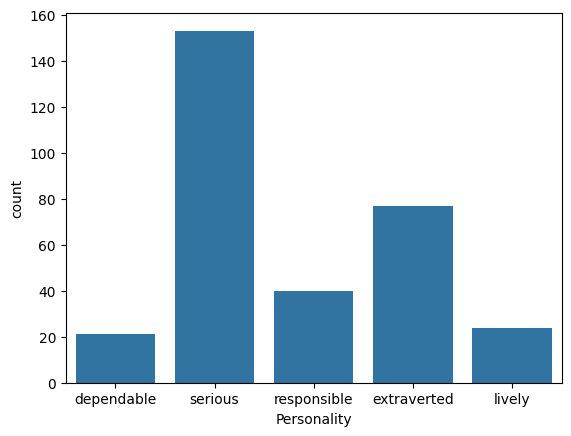

In [10]:
sns.countplot(data=df,x=df['Personality'])

In [11]:
df.isna().sum()

gender                0
age                   0
openness              0
neuroticism           0
conscientiousness     0
agreeableness         0
extraversion          0
Personality           0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['Personality']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['Personality'] = encoded_values

In [13]:
df.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,0
1,Male,17,5,4,5,2,4,4
2,Female,25,5,5,7,2,4,4
3,Female,18,6,2,7,4,7,4
4,Female,19,2,4,7,1,3,3


In [40]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(["gender"])
df=encoder.fit_transform(df)


In [41]:
df.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,1,20,7,9,9,5,5,0
1,2,17,5,4,5,2,4,4
2,1,25,5,5,7,2,4,4
3,1,18,6,2,7,4,7,4
4,1,19,2,4,7,1,3,3


In [42]:
X=df.drop(['Personality'],axis=1)
y=df['Personality']

In [43]:
X

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1,20,7,9,9,5,5
1,2,17,5,4,5,2,4
2,1,25,5,5,7,2,4
3,1,18,6,2,7,4,7
4,1,19,2,4,7,1,3
...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3
311,2,18,2,5,8,3,7
312,2,18,7,5,6,2,7
313,2,23,6,7,5,4,3


In [44]:
y

0      0
1      4
2      4
3      4
4      3
      ..
310    1
311    0
312    4
313    1
314    1
Name: Personality, Length: 315, dtype: int32

In [45]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [46]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [47]:
X_resampled

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1,20,7,9,9,5,5
1,2,17,5,4,5,2,4
2,1,25,5,5,7,2,4
3,1,18,6,2,7,4,7
4,1,19,2,4,7,1,3
...,...,...,...,...,...,...,...
760,1,18,4,5,5,4,5
761,1,17,5,5,3,1,5
762,1,18,4,5,5,4,5
763,2,19,4,4,4,4,3


In [48]:
y_resampled

0      0
1      4
2      4
3      4
4      3
      ..
760    3
761    3
762    3
763    3
764    3
Name: Personality, Length: 765, dtype: int32

In [49]:
df_updated=X_resampled

In [50]:
df_updated['Personality']=y_resampled

In [51]:
df_updated.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,1,20,7,9,9,5,5,0
1,2,17,5,4,5,2,4,4
2,1,25,5,5,7,2,4,4
3,1,18,6,2,7,4,7,4
4,1,19,2,4,7,1,3,3


<Axes: xlabel='Personality', ylabel='count'>

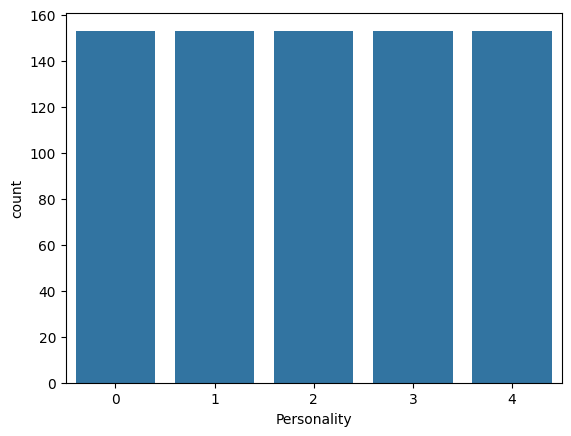

In [52]:
sns.countplot(data=df_updated,x='Personality')

In [53]:
label_mapping

{'dependable': 0,
 'extraverted': 1,
 'lively': 2,
 'responsible': 3,
 'serious': 4}

In [54]:
from sklearn.model_selection import train_test_split 
data_train,data_test=train_test_split(df_updated,test_size=0.2,random_state=39)

In [55]:
data_train.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
89,1,17,6,3,5,6,4,4
8,2,20,6,4,5,6,6,4
383,2,18,6,6,3,6,6,0
337,2,19,6,7,7,4,4,0
106,1,22,6,2,1,6,6,4


In [56]:
data_test.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
269,2,18,6,6,3,2,6,4
44,1,25,4,6,6,3,6,0
310,1,19,6,5,6,4,3,1
213,1,20,5,8,2,5,7,1
73,2,25,7,2,5,5,5,4


In [57]:
X_train=data_train.drop(["Personality"],axis=1)
y_train=data_train["Personality"]
X_test=data_test.drop(["Personality"],axis=1)
y_test=data_test["Personality"]

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p1=rfc.predict(X_test)
print(accuracy_score(y_test,y_p1))
print(confusion_matrix(y_test,y_p1))

0.9477124183006536
[[25  0  0  0  0]
 [ 0 37  0  0  3]
 [ 0  0 34  0  0]
 [ 0  0  0 22  0]
 [ 2  3  0  0 27]]


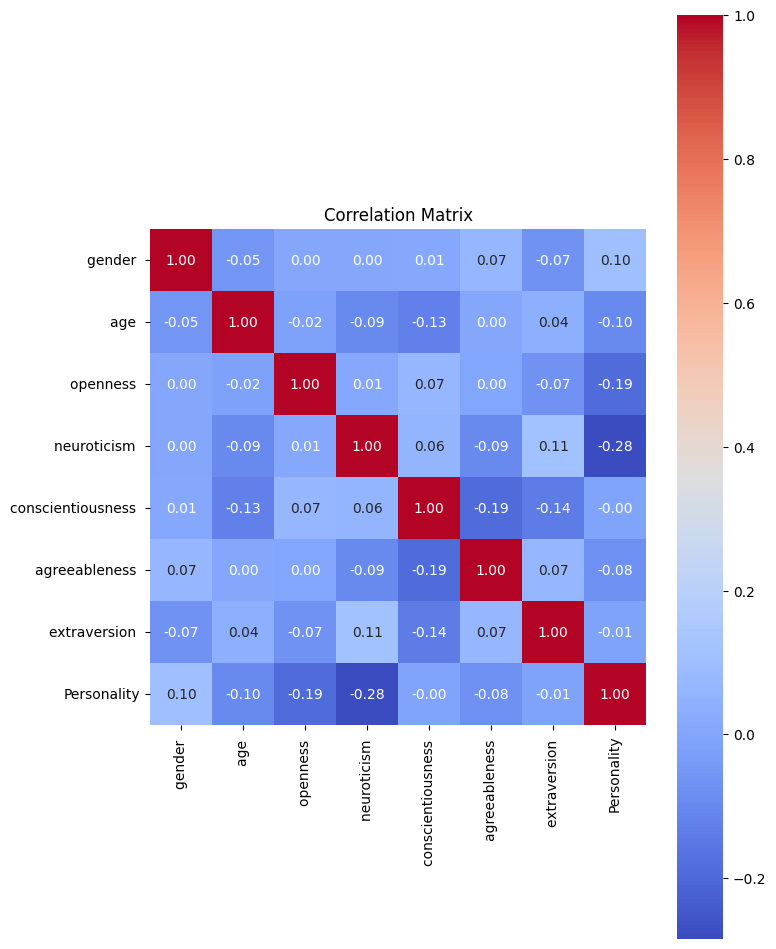

In [60]:
corr_mat = df_updated.corr()

# Plotting heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [61]:
print(classification_report(y_test, y_p1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.93      0.93      0.93        40
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        22
           4       0.90      0.84      0.87        32

    accuracy                           0.95       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153



In [64]:
#save in joblib
import joblib
joblib.dump(rfc, 'Personality.joblib')

['Personality.joblib']

In [62]:
#save to pickle
import pickle
with open('char_disorder.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [47]:
# # Save the model using pickle
# import pickle

# # Assuming 'model' is your trained model
# model = rfc  # Your trained model instance
# with open("character.pkl", 'wb') as f:
#     pickle.dump(model, f)